### Модель Титаник

### Импортируем библиотеки

In [1]:
# импортируем библиотеки
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns 
import matplotlib

In [2]:
#настройка, чтобы можно было просматривать все столбцы датафрейма
matplotlib.rcParams.update({'font.size': 14})
pd.options.display.max_columns = 100

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

### Загружаем данные

In [3]:
adres_data = 'C:/Users/lazarevnv/OneDrive/!Обучение/RuCode/model_titanic/titanic_data.csv'
adres_surv = 'C:/Users/lazarevnv/OneDrive/!Обучение/RuCode/model_titanic/titanic_surv.csv'

In [4]:
df_data = pd.read_csv(adres_data)

In [5]:
df_surv = pd.read_csv(adres_surv)

In [8]:
df = pd.merge(df_data, df_surv, left_index = True, right_index = True)

### Смотрим что загрузили

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


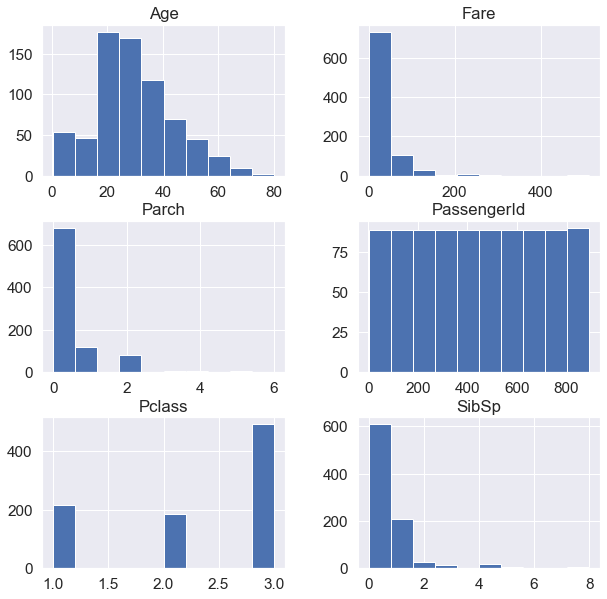

In [344]:
df_data.hist(df_data.columns, figsize = (10, 10))
plt.show()

## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

In [345]:
# количество по полу
df_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [346]:
# распределенеие пассажиров по полу
df_data['Sex'].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [347]:
# распределение по классам пассажиров
df_data.Pclass.value_counts(normalize = True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [348]:
# смотрим сколько вообще спаслось 
print(df['Survived'].value_counts())
df['Survived'].value_counts(normalize = True)

0    549
1    342
Name: Survived, dtype: int64


0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Аналитика выживания по полу
разницы выживания по полу практически нет.
Женщин выжило больше на 0,2%

In [349]:
# доля выживших мужчин к общему количеству мужчин
df.loc[(df['Sex'] == 'male'), 'Survived'].value_counts(normalize = True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [350]:
# доля выживших женщин к общему количеству женщин
df.loc[(df['Sex'] == 'female'), 'Survived'].value_counts(normalize = True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

#### Аналитика выживания по возрасту

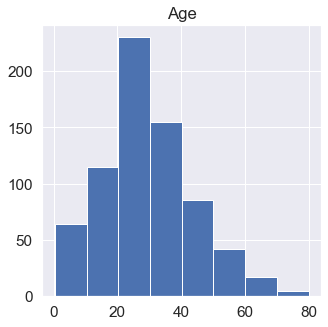

In [351]:
df.hist(column = 'Age', bins = 8, figsize = (5, 5))
plt.show()

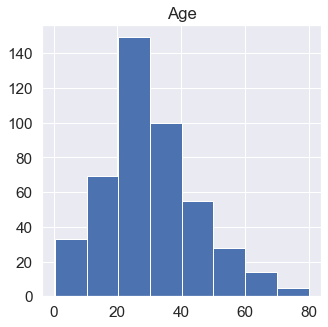

In [352]:
df.loc[(df['Sex'] == 'male')].hist(column = 'Age', bins = 8, figsize = (5, 5))
plt.show()

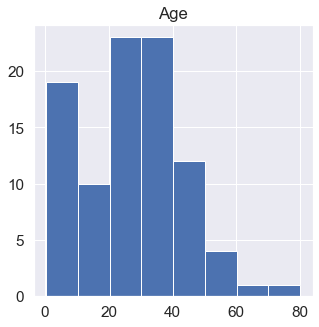

In [353]:
df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1)].hist(column = 'Age', bins = 8, figsize = (5, 5))
plt.show()

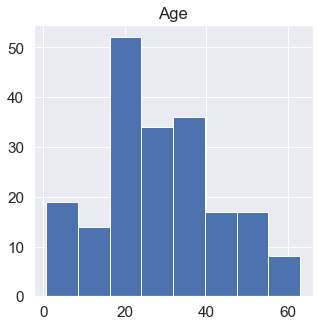

In [354]:
df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1)].hist(column = 'Age', bins = 8, figsize = (5, 5))
plt.show()

#### Аналитика выживания по классу пассажиров
Выросла доля спасшыхся женщин 1-го класса, как и доля спасшихся мужчин 3-го класса.

In [358]:
df.loc[(df['Sex'] == 'male'), 'Pclass'].value_counts(normalize = True)

3    0.601386
1    0.211438
2    0.187175
Name: Pclass, dtype: float64

In [359]:
df.loc[(df['Sex'] == 'male') & (df['Survived'] == 1), 'Pclass'].value_counts(normalize = True)

3    0.431193
1    0.412844
2    0.155963
Name: Pclass, dtype: float64

In [360]:
df.loc[(df['Sex'] == 'female'), 'Pclass'].value_counts(normalize = True)

3    0.458599
1    0.299363
2    0.242038
Name: Pclass, dtype: float64

In [361]:
df.loc[(df['Sex'] == 'female') & (df['Survived'] == 1), 'Pclass'].value_counts(normalize = True)

1    0.390558
3    0.309013
2    0.300429
Name: Pclass, dtype: float64

In [362]:
df.loc[(df['Sex'] == 'female'), 'Pclass'].value_counts(normalize = True)

3    0.458599
1    0.299363
2    0.242038
Name: Pclass, dtype: float64

## Заполнение пропусков в данных

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.loc[df['Cabin'].isnull(), 'Cabin'] = 0

In [10]:
df.loc[df['Embarked'].isnull(), 'Embarked'] = 'S'

In [11]:
median_age = df['Age'].median()
df.loc[df['Age'].isnull(), 'Age'] = median_age

In [366]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)


Ввел новый признак тип каюты - Cabin_type. Вероятно буква указывает на место располождения кают.

In [372]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [12]:
# формируем новый признак
df['Cabin_type'] = df.Cabin.str[0]

In [235]:
# формируем новый признак
# X['Cabin_type'] = X.Cabin.str[0]

In [374]:
df['Cabin_type'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [375]:
df['Cabin_type'].value_counts(normalize = True)

C    0.289216
B    0.230392
D    0.161765
E    0.156863
A    0.073529
F    0.063725
G    0.019608
T    0.004902
Name: Cabin_type, dtype: float64

In [376]:
df['Cabin_type'].count()

204

In [377]:
df.loc[df['Cabin_type'].isnull()].count()

PassengerId    687
Pclass         687
Name           687
Sex            687
Age            687
SibSp          687
Parch          687
Ticket         687
Fare           687
Cabin          687
Embarked       687
Survived       687
Cabin_type       0
dtype: int64

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
 12  Cabin_type   204 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [13]:
categorial_data = df[['Embarked']]
categorial_data.tail(3)

,Embarked
888,S
889,C
890,Q


In [387]:
df.tail(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Cabin_type
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,0,S,0,NaN
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1,C
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,0,Q,0,NaN


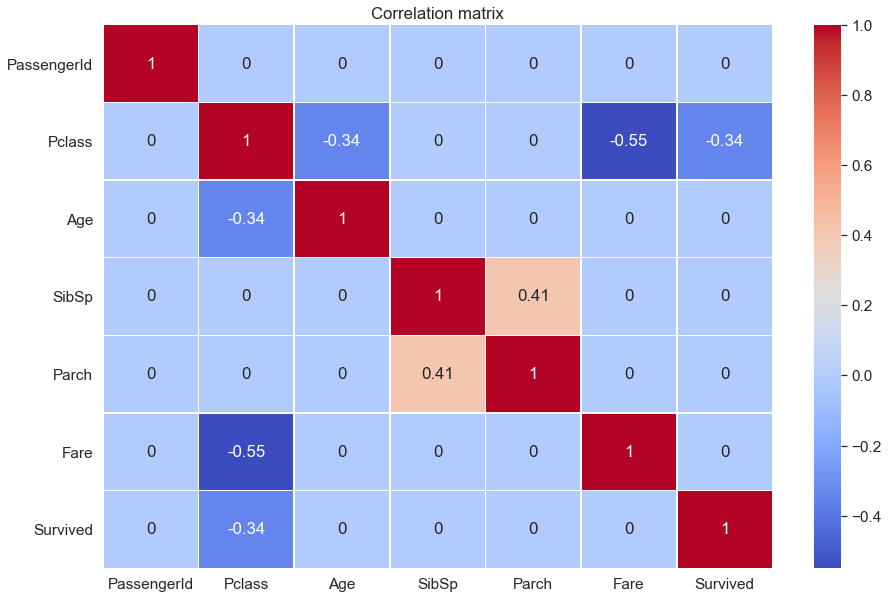

In [386]:
plt.figure(figsize = (15,10)) # тоже нахождения корреляции - линейной зависимости между признаками

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [14]:
df['Sex'] = (df['Sex'] == 'male').astype(int)

In [15]:
dummy_features = pd.get_dummies(categorial_data)
dummy_features

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [16]:
df = pd.concat([df, dummy_features], axis = 1)

In [26]:
# df_first = df[['Age', 'SibSp', 'Parch', 'Fare',
#       'Pclass', 'Sex', 'Embarked_C', 'Embarked_Q',
#        'Embarked_S']]

In [278]:
# X_first = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
#        'Embarked_S']]

In [17]:
dummy_Cabin_type = pd.get_dummies(df[['Cabin_type']])
dummy_Cabin_type

,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0
887,0,1,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0
889,0,0,1,0,0,0,0,0


In [18]:
df = pd.concat([df, dummy_Cabin_type], axis = 1)

In [405]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Cabin_type',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_type_A',
       'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
       'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T'],
      dtype='object')

In [398]:
df_first = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q',
       'Embarked_S']]

In [400]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int32  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int32(1), int64(3), uint8(3)
memory usage: 41.0 KB


In [401]:
df_first.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
888,3,0,28.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,3,1,32.0,0,0,7.75,0,1,0


## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [27]:
from sklearn.linear_model import LogisticRegression

In [409]:
df_first.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [410]:
X_train = df_first

In [411]:
X_train.tail(4)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
887,1,0,19.0,0,0,30.00,0,0,1
888,3,0,28.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,3,1,32.0,0,0,7.75,0,1,0


In [30]:
y_train = df['Survived']

#### Обучение модели без стандартизации

In [417]:
lr = LogisticRegression(solver="liblinear")
# C = сила регуляризации

In [419]:
lr.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [420]:
y_train_pred = lr.predict(X_train)

In [421]:
y_train_pred[:3]

array([0, 1, 1], dtype=int64)

### Смотрим показатели полученной модели

In [422]:
print(f'Train roc-auc: {roc_auc_score(y_train, y_train_pred)}')

Train roc-auc: 0.7829306873741732


In [423]:
# смотрим коэф w0
lr.intercept_

array([3.04330116])

In [424]:
# смотрим коэффициенты
lr.coef_

array([[-0.87440767, -2.51542618, -0.03001893, -0.29506434, -0.07884818,
         0.00385203,  1.19709242,  1.02662104,  0.8195877 ]])

In [425]:
df_first.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

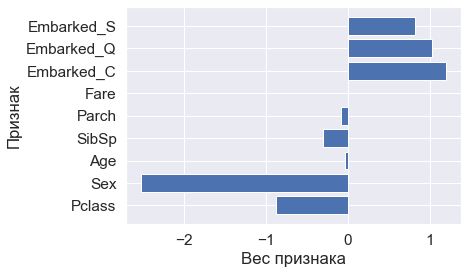

In [426]:
# визуализируем веса признаков
df_first_columns = df_first.columns
plt.rcParams['figure.figsize'] = 6, 4

# plt.barh(feature_names,)
plt.barh(df_first_columns, lr.coef_.flatten())
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

In [427]:
from sklearn.metrics import accuracy_score

In [428]:
# подсчёт правильных ответов accuracy_score
acc_sc = accuracy_score(y_train, y_train_pred)
print('accuracy_score: ', acc_sc)

accuracy_score:  0.8024691358024691


In [429]:
#  метрики качества
#  матрица ошибок  confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
print(cm)

[[476  73]
 [103 239]]


Данная матрица содержит в себе 4 значения:

True Negative (TN) - случаи, когда мы правильно классифицировали объект как объект класса 0 (левое верхнее значение)

False Positive (FP) - случаи, когда мы классифицировали объект как объект класса 1, хотя, он на самом деле имеет класс 0 (правое верхнее)

False Negative (FN) - классифицировали объект как объект класса 0, а на самом деле он имеет класс 1 (левое нижнее)

True Positive (TP) - правильно классифицировали объект как объект класса 1 (правое нижнее)

In [430]:
print('y_train_pred:', ((y_train == 1) & (y_train_pred == 1)).sum())

y_train_pred: 239


In [431]:
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
print(TN, FP, FN, TP)

476 73 103 239


In [432]:
# подчсет  precision (точность)
# Метрика precision (точность) является долей объектов класса 1, 
# верно классифицированных моделью, к общему числу объектов, которые модель 
# классифицировала как объекты класса 1

precision = TP / (TP + FP)
print(precision)

from sklearn.metrics import precision_score
precision_score(y_train, y_train_pred)

0.7660256410256411


0.7660256410256411

In [433]:
#  Метрика recall (полнота) является долей найденных моделью объектов класса 1
recall = TP / (TP + FN)
print(recall)

from sklearn.metrics import recall_score
recall_score(y_train, y_train_pred)

0.6988304093567251


0.6988304093567251

In [434]:
# Хорошим способом комбинировать эти две метрики является мера  F1
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.7308868501529052

In [435]:
# расчитываем f1 вручную
f1_ = 2 * precision * recall / (precision + recall)
f1_

0.7308868501529052

In [436]:
pd.DataFrame(y_train)['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [437]:
pd.DataFrame(y_train_pred)[0].value_counts()

0    579
1    312
Name: 0, dtype: int64

### Стандартизация данных

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [439]:
X_train_scaled = scaler.fit_transform(X_train)

In [440]:
feature_names = X_train.columns
feature_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [441]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_train_scaled.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,-0.482043,-0.307562,0.615838
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,2.074505,-0.307562,-1.623803
890,0.827377,0.737695,0.202762,-0.474545,-0.473674,-0.492378,-0.482043,3.251373,-1.623803


### Модель со стандартизацией

In [442]:
lr.fit(X_train_scaled, y_train)

LogisticRegression(solver='liblinear')

In [443]:
y_train_pred_scaled = lr.predict(X_train_scaled)

In [444]:
# мера  F1
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred_scaled)

0.7283763277693475

### Проведем кросс-валидацию для логистической регрессии
Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [34]:
from sklearn.model_selection import GridSearchCV

In [36]:
parameters = {'C': np.logspace(-1, 1, 10), 'penalty': ['l1', 'l2']}

In [506]:
# param_grid = {'C': np.logspace(-1, 1, 10)}

In [454]:
# parameters = {param_name: grid}
# parameters

{'C': [1, 3, 5, 7, 10]}

In [557]:
gs = GridSearchCV(
    estimator = lr,
    scoring = 'roc_auc',
#     scoring = 'f1',
#     scoring = 'accuracy',
    param_grid = parameters,
    n_jobs = -1,
    cv = 5
)


In [558]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [559]:
means = gs.cv_results_['mean_test_score']
error = gs.cv_results_['std_test_score']

In [564]:
# лучший параметр
print(gs.best_estimator_)

LogisticRegression(C=0.16681005372000587, penalty='l1', solver='liblinear')


In [560]:
# смотрим рузультат при разных параметрах
means, error

(array([0.84930653, 0.84927918, 0.85049418, 0.84924987, 0.84986226,
        0.84866459, 0.84940948, 0.84866289, 0.84890087, 0.84874252,
        0.84860772, 0.84828841, 0.84860636, 0.84849946, 0.84855259,
        0.84836577, 0.84849926, 0.8483664 , 0.84855182, 0.8483664 ]),
 array([0.01374285, 0.01346502, 0.01321065, 0.01336343, 0.01329168,
        0.01378926, 0.01386818, 0.01440304, 0.01423719, 0.0145767 ,
        0.0145356 , 0.01465046, 0.01479085, 0.01467483, 0.01491762,
        0.01474734, 0.01488894, 0.01482299, 0.01500867, 0.01482299]))

In [570]:
# Средняя точность измерений
gs.score(X_train_scaled, y_train)

0.8571112815432632

### Построим модель на лучших параметрах

In [ ]:
from sklearn.metrics import f1_score

In [565]:
lr_best = LogisticRegression(solver="liblinear", C = 0.16681005372000587, penalty = 'l1')

In [566]:
lr_best.fit(X_train_scaled, y_train)

LogisticRegression(C=0.16681005372000587, penalty='l1', solver='liblinear')

In [567]:
y_train_pred_scaled_best = lr_best.predict(X_train_scaled)
print(f'Train roc-auc: {roc_auc_score(y_train, y_train_pred_scaled_best)}')

Train roc-auc: 0.7818521714121369


In [568]:
# мера  F1
f1_score(y_train, y_train_pred_scaled_best)

0.7300150829562594

In [575]:
# Средняя точность измерений
lr_best.score(X_train_scaled, y_train)

0.7991021324354658

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [577]:
df.columns, X_train.columns

(Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived', 'Cabin_type',
        'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Cabin_type_A',
        'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
        'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T'],
       dtype='object'),
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
        'Embarked_Q', 'Embarked_S'],
       dtype='object'))

In [19]:
df_correct = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
        'Embarked_Q', 'Embarked_S', 'Cabin_type_A',
        'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
        'Cabin_type_F', 'Cabin_type_G', 'Cabin_type_T']]

In [579]:
df_correct.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
888,3,0,28.0,1,2,23.45,0,0,1,0,0,0,0,0,0,0,0
889,1,1,26.0,0,0,30.00,1,0,0,0,0,1,0,0,0,0,0
890,3,1,32.0,0,0,7.75,0,1,0,0,0,0,0,0,0,0,0


In [22]:
# Стандартизируем данные
X_train_scaled_correct = scaler.fit_transform(df_correct)

In [24]:
feature_names = df_correct.columns
feature_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Cabin_type_A', 'Cabin_type_B',
       'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E', 'Cabin_type_F',
       'Cabin_type_G', 'Cabin_type_T'],
      dtype='object')

In [25]:
X_train_scaled_correct = pd.DataFrame(X_train_scaled_correct, columns = feature_names)
X_train_scaled_correct.tail(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_type_A,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,-0.482043,-0.307562,0.615838,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,2.074505,-0.307562,-1.623803,-0.130856,-0.235981,3.755222,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352
890,0.827377,0.737695,0.202762,-0.474545,-0.473674,-0.492378,-0.482043,3.251373,-1.623803,-0.130856,-0.235981,-0.266296,-0.196116,-0.193009,-0.121681,-0.067153,-0.03352


In [28]:
lr_2 = LogisticRegression(solver="liblinear")

In [31]:
lr_2.fit(X_train_scaled_correct, y_train)

LogisticRegression(solver='liblinear')

In [37]:
gs_2 = GridSearchCV(
    estimator = lr_2,
    scoring = 'roc_auc',
#     scoring = 'f1',
#     scoring = 'accuracy',
    param_grid = parameters,
#     param_grid = param_grid,
    n_jobs = -1,
    cv = 5
)

In [38]:
gs_2.fit(X_train_scaled_correct, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [39]:
# лучший параметр
print(gs_2.best_estimator_)

LogisticRegression(C=0.16681005372000587, penalty='l1', solver='liblinear')


In [40]:
# Средняя точность измерений
gs_2.score(X_train_scaled_correct, y_train)

0.8622109310921506

Вывод: про добавлении новых полей средняя точность увеличилась на 1%

In [41]:
means_2 = gs_2.cv_results_['mean_test_score']
error_2 = gs_2.cv_results_['std_test_score']

In [42]:
means_2, error_2

(array([0.85072645, 0.84747478, 0.85124614, 0.84731304, 0.84926317,
        0.84669613, 0.84779491, 0.8464553 , 0.84781922, 0.84621368,
        0.84672442, 0.84599954, 0.84656176, 0.84597396, 0.84621427,
        0.84597401, 0.84608034, 0.84600036, 0.84594742, 0.84594665]),
 array([0.01412439, 0.01602264, 0.0146983 , 0.01635585, 0.01512774,
        0.0166247 , 0.01574932, 0.01715949, 0.01647868, 0.01749979,
        0.01697331, 0.01761621, 0.01724015, 0.0177428 , 0.01755495,
        0.01764535, 0.01753064, 0.0176419 , 0.01761547, 0.01766448]))

## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [605]:
# lr_2
model_dt = DecisionTreeClassifier()
model_knn = KNeighborsClassifier()
model_svc = SVC()
model_nb = BernoulliNB()
model_gb = GradientBoostingRegressor()

In [606]:
model_dict = {0: 'Логистическая регрессия', 1:  'Дерево решений', 2: 'Метод k ближайших соседей',
              3: 'Метод опорных векторов', 4: 'Наивный байесовский классификатор', 
#               5: 'Градиентный бустинг'
             }

In [610]:
models_list = [lr_2, model_dt, model_knn, model_svc, model_nb]

In [611]:
for i, model in enumerate(models_list):
    accuracy_model = cross_val_score(model, X_train_scaled_correct, \
                                     y_train, cv = 5, scoring = 'f1').mean()
    print(f'{model_dict[i]}, тестовая точность измерений: {accuracy_model}')

Логистическая регрессия, тестовая точность измерений: 0.7232932866838235
Дерево решений, тестовая точность измерений: 0.712051370129143
Метод k ближайших соседей, тестовая точность измерений: 0.723204321335405
Метод опорных векторов, тестовая точность измерений: 0.7380905806460184
Наивный байесовский классификатор, тестовая точность измерений: 0.6628018184701918


#### Используем метод ближайших соседей KNN

In [612]:
k_values = np.arange(1, 11)
# accuracy_on_valid = []
accuracy_on_train = []
for i, value in enumerate(k_values):
    clf = KNeighborsClassifier(n_neighbors=value)
    clf.fit(X_train_scaled_correct, y_train)
#     y_pred = clf.predict(X_train_scaled_correct)
    y_pred_train = clf.predict(X_train_scaled_correct)
#     acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    if i % 2 == 0:
        print('K = {}'.format(value))
#         print('\tacc_valid = {}'.format(acc_valid))
        print('\tacc_train = {}\n'.format(acc_train))
#     accuracy_on_valid.append(acc_valid)
    accuracy_on_train.append(acc_train)

K = 1
	acc_train = 0.978675645342312

K = 3
	acc_train = 0.8664421997755332

K = 5
	acc_train = 0.8529741863075196

K = 7
	acc_train = 0.8417508417508418

K = 9
	acc_train = 0.8305274971941639



In [655]:
clf = KNeighborsClassifier()

In [656]:
parameters = {'n_neighbors': [ 4,  6,  8, 11, 13, 15, 18, 20, 22, 25]}

In [657]:
gs_knn = GridSearchCV(
    estimator = clf,
    scoring = 'roc_auc',
#     scoring = 'f1',
#     scoring = 'accuracy',
    param_grid = parameters,
    n_jobs = -1,
    cv = 5
)


In [658]:
gs_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [4, 6, 8, 11, 13, 15, 18, 20, 22, 25]},
             scoring='roc_auc')

In [660]:
means_knn = gs_knn.cv_results_['mean_test_score']
error_knn = gs_knn.cv_results_['std_test_score']

In [662]:
# смотрим рузультат при разных параметрах
means_knn, error_knn

(array([0.83656019, 0.85035736, 0.85211428, 0.85643225, 0.85592814,
        0.85292503, 0.85335015, 0.85633764, 0.85729931, 0.85863253]),
 array([0.03005174, 0.03188551, 0.03205593, 0.03148268, 0.03099724,
        0.03408794, 0.02844873, 0.02650837, 0.02724412, 0.02636166]))

In [661]:
# лучший параметр
print(gs_knn.best_estimator_)

KNeighborsClassifier(n_neighbors=25)


## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

#### построим модель на лучших параметрах

In [44]:
clf_best = KNeighborsClassifier(n_neighbors = 25)

In [46]:
clf_best.fit(X_train_scaled_correct, y_train)

KNeighborsClassifier(n_neighbors=25)

In [49]:
y_train_pred_scaled_clf_best = clf_best.predict(X_train_scaled_correct)
print(f'Train roc-auc: {roc_auc_score(y_train, y_train_pred_scaled_clf_best)}')

Train roc-auc: 0.7979340427571663


In [52]:
# мера  F1
f1_score(y_train, y_train_pred_scaled_clf_best)

0.7507418397626113

#### Загрузим тестовые данные

In [63]:
# # для работы
X_test_adress = 'C:/Users/lazarevnv/OneDrive/!Обучение/RuCode/model_titanic/test.csv'
y_test_adress = 'C:/Users/lazarevnv/OneDrive/!Обучение/RuCode/model_titanic/gender_submission.csv'

In [104]:
X_test_data = pd.read_csv(X_test_adress)
y_test = pd.read_csv(y_test_adress)

In [197]:
y_test_ = y_test['Survived']

In [161]:
# метод предобработки данных
def preprocessing(X):
    '''метод предобработки данных'''
    
    '''Заполнение пропусков в данных'''
    X.loc[X['Cabin'].isnull(), 'Cabin'] = 0
    X.loc[X['Embarked'].isnull(), 'Embarked'] = 'S'
    median_age = X['Age'].median()
    X.loc[X['Age'].isnull(), 'Age'] = median_age
    median_fare = X['Fare'].median()
    X.loc[X['Fare'].isna(), 'Fare'] = median_fare
    '''Выделение новых признаков'''
    X['Cabin_type'] = X.Cabin.str[0]
    
    '''Кодирование категориальных признаков'''
    X['Sex'] = (X['Sex'] == 'male').astype(int)

    dummy_features = pd.get_dummies(X[['Embarked']])
    X = pd.concat([X, dummy_features], axis = 1)
    
    dummy_Cabin_type = pd.get_dummies(X[['Cabin_type']])
    X = pd.concat([X, dummy_Cabin_type], axis = 1)
    
    X_correct = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
        'Embarked_Q', 'Embarked_S', 'Cabin_type_A',
        'Cabin_type_B', 'Cabin_type_C', 'Cabin_type_D', 'Cabin_type_E',
        'Cabin_type_F', 'Cabin_type_G']]
    X_correct['Cabin_type_T'] = 0
    
    '''Стандартизация данных'''
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_correct)
    feature_names = X_correct.columns
    X_scaled = pd.DataFrame(X_scaled, columns = feature_names)
    
    return X_correct, X_scaled

In [162]:
X_test, X_test_scaled = preprocessing(X_test_data)

<ipython-input-161-e9ff2406636f>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_correct['Cabin_type_T'] = 0


#### Сделаем прогноз на тестовых данных по обученной ранее модели KNN

In [182]:
y_test_pred = clf_best.predict(X_test_scaled)

In [176]:
print(f'Train roc-auc: {roc_auc_score(y_test_, y_test_pred)}')

Train roc-auc: 0.581296992481203


In [177]:
# мера  F1
f1_score(y_test_, y_test_pred)

0.40963855421686746

In [178]:
# прогноз на нестандартизированых данных
y_test_pred_ = clf_best.predict(X_test)

In [179]:
print(f'Train roc-auc: {roc_auc_score(y_test_, y_test_pred_)}')

Train roc-auc: 0.6029135338345865


In [180]:
# мера  F1
f1_score(y_test_, y_test_pred_)

0.5440414507772021

#### Сделаем прогноз на тестовых данных по обученной ранее модели lr (удалить)

In [ ]:
lr_2

In [183]:
y_test_pred_lr = lr_2.predict(X_test_scaled)

In [184]:
print(f'Train roc-auc: {roc_auc_score(y_test_, y_test_pred_lr)}')

Train roc-auc: 0.5366541353383459


In [185]:
# мера  F1
f1_score(y_test_, y_test_pred_lr)

0.3387096774193548

#### Для сравнения рассчитываем прогноз на логистической регрессии - результат хуже чем на вспомогательной модели

In [186]:
lr_best = LogisticRegression(solver="liblinear", C = 0.16681005372000587, penalty='l1')

In [188]:
lr_best.fit(X_train_scaled_correct, y_train)

LogisticRegression(C=0.16681005372000587, penalty='l1', solver='liblinear')

In [189]:
y_test_pred_lr_best = lr_best.predict(X_test_scaled)

In [190]:
print(f'Train roc-auc: {roc_auc_score(y_test_, y_test_pred_lr_best)}')

Train roc-auc: 0.5493421052631579


In [191]:
# мера  F1
f1_score(y_test_, y_test_pred_lr_best)

0.3686274509803922

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

1. Сработало сравнение различных моделей для выбора вспомогательной модели расчета - метод ближайших соседей KNN. Он показал более высокий результат чем первоначальная модель - логистическая регрессия.
2. Подбор оптимального параметра, как правило добавляет несколько процентов к точности модели.
3. Добавленные дамми-переменные также улучшили точность прогноза.
4. Прогноз на нестандандартизированных тестовых данных показал более точный результат.
5. Основная оценка модели проведена по показателям roc-auc и f17.